In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.random import uniform, normal
from time import perf_counter

In [50]:
a = 1
b = np.sin(a)
b

0.8414709848078965

Running RK45:
Simulation run time: 2.508709899997484


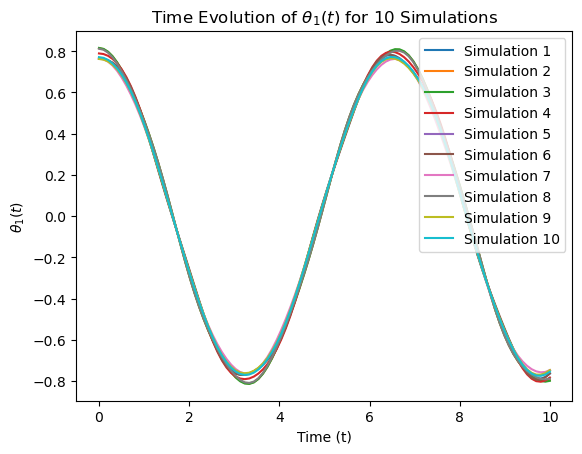

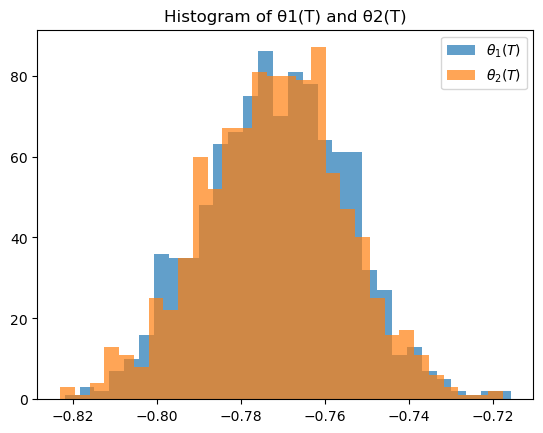

Expectation of θ1(T): -0.7715715547898572
Standard deviation of θ1(T): 0.01691934605348513
Probability 0 < θ1(T) < π/4: 0.0

Running Radau:
Simulation run time: 11.028199600001244


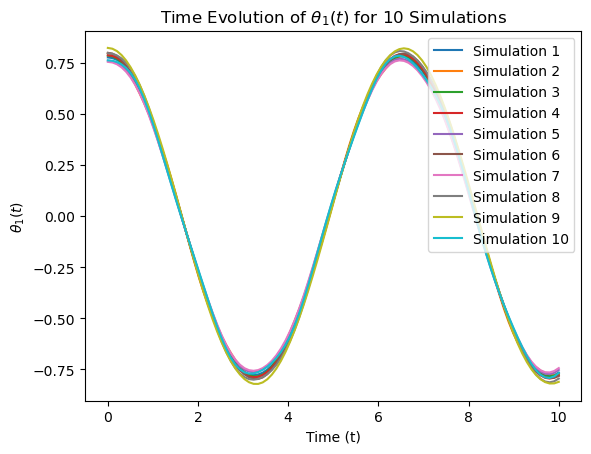

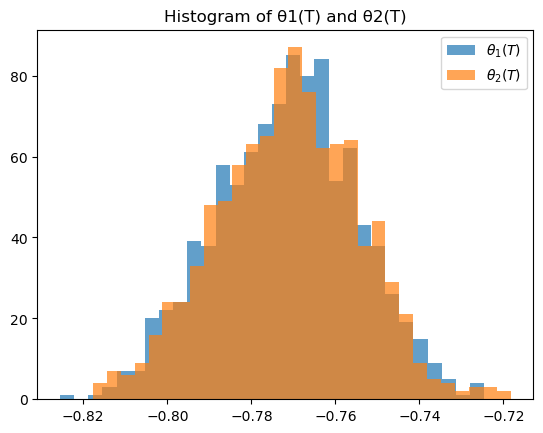

Expectation of θ1(T): -0.771500390765752
Standard deviation of θ1(T): 0.01672599842525786
Probability 0 < θ1(T) < π/4: 0.0


In [51]:

class DoublePendulumSimulator:
    def __init__(self, T=10, n_simulations=1000, delta=0.2, theta_mean=np.pi/4, theta_std=0.02):
        self.T = T
        self.n_simulations = n_simulations
        self.alpha_l = 10 - delta
        self.alpha_u = 10 + delta
        self.theta_mean = theta_mean
        self.theta_std = theta_std
        self.theta1_T_values = []
        self.theta2_T_values = []
        self.start_time = 0
        self.end_time = 0
    def pendulum_system(self, t, y, alpha):
        theta1, z1, theta2, z2 = y
        dtheta1_dt = z1
        dz1_dt = -np.sin(theta1) + alpha * (theta2 - theta1)
        dtheta2_dt = z2
        dz2_dt = -np.sin(theta2) + alpha * (theta1 - theta2)
        return [dtheta1_dt, dz1_dt, dtheta2_dt, dz2_dt]

    def run_simulation(self, method='RK45'):
        self.theta1_T_values = []
        self.theta2_T_values = []
        self.start_time = perf_counter()
        for i in range(self.n_simulations):
            # Random values for alpha, theta1(0), and theta2(0)
            alpha = uniform(self.alpha_l, self.alpha_u)
            theta1_0 = normal(self.theta_mean, self.theta_std)
            theta2_0 = normal(self.theta_mean, self.theta_std)      
            y0 = [theta1_0, 0, theta2_0, 0]
            # Solve the ODEs using the chosen method
            sol = solve_ivp(self.pendulum_system, [0, self.T], y0, method=method,
                            t_eval=np.linspace(0, self.T, 100), args=(alpha,))

            # Extract the final values at time T
            theta1_T = sol.y[0, -1]
            theta2_T = sol.y[2, -1]

            # Store the final values for later analysis
            self.theta1_T_values.append(theta1_T)
            self.theta2_T_values.append(theta2_T)

            # Plot θ1(t) for the first few simulations
            if i < 10:  # Plot only the first few results
                plt.plot(sol.t, sol.y[0], label=f'Simulation {i+1}')
        self.end_time = perf_counter()
        print(f"Simulation run time: {self.end_time - self.start_time}")
        plt.title(r'Time Evolution of $\theta_1(t)$ for 10 Simulations')
        plt.xlabel('Time (t)')
        plt.ylabel(r'$\theta_1(t)$')
        plt.legend()
        plt.show()

    def analyze_results(self):
        theta1_T_values = np.array(self.theta1_T_values)
        theta2_T_values = np.array(self.theta2_T_values)

        # Histograms of θ1(T) and θ2(T)
        plt.hist(theta1_T_values, bins=30, alpha=0.7, label=r'$\theta_1(T)$')
        plt.hist(theta2_T_values, bins=30, alpha=0.7, label=r'$\theta_2(T)$')
        plt.title('Histogram of θ1(T) and θ2(T)')
        plt.legend()
        plt.show()

        # Estimate expectation and standard deviation of θ1(T)
        mean_theta1_T = np.mean(theta1_T_values)
        std_theta1_T = np.std(theta1_T_values)
        print(f"Expectation of θ1(T): {mean_theta1_T}")
        print(f"Standard deviation of θ1(T): {std_theta1_T}")

        # Estimate the probability that 0 < θ1(T) < π/4, It should be 0
        epsilon = 1e-10
        prob_theta1_in_range = np.mean((0 + epsilon < theta1_T_values) & (theta1_T_values < np.pi / 4 - epsilon))
        print(f"Probability 0 < θ1(T) < π/4: {prob_theta1_in_range}")

if __name__ == "__main__":
    simulator = DoublePendulumSimulator(T=10, n_simulations=1000)
    # Run simulation with different methods
    
    print("Running RK45:")
    simulator.run_simulation(method='RK45')
    simulator.analyze_results()

    print("\nRunning Radau:")
    simulator.run_simulation(method='Radau')
    simulator.analyze_results()


**MassMatAssembler** 
The system of equations can be computed using the standard assembly technique. Thus the M matrix is successively computed by looping over the elements, for each element adding the element M matrix, viz.,

$$
\frac{h}{6}\begin{bmatrix}
2& -1& & & \\
-1& 2& & & \\
& & & & \\
& & & & \\
& & & & \\
& & & & 
\end{bmatrix} +
\frac{h}{6}\begin{bmatrix}
& & & & \\
&2 &-1 & & \\
& -1&2 & & \\
& & & & \\
& & & & \\
& & & & 
\end{bmatrix}+\cdots + 
\frac{h}{6}\begin{bmatrix}
& & & & \\
& & & & \\
& & & & \\
& & & & \\
& & & 2&-1 \\
& & & -1&2 
\end{bmatrix}
$$

Each element matrix is found by performing the integration 
$
M_{ij} = \int_a^b \phi_j\phi_i dx
$
over a single element. 

**StiffMatAssembler** 
The above system of equations can be computed using the standard assembly technique. Thus the stiffness matrix is successively computed by looping over the elements, for each element adding the element stiffness matrix, viz.,

$$
\frac{1}{h}\begin{bmatrix}
1& -1& & & \\
-1& 1& & & \\
& & & & \\
& & & & \\
& & & & \\
& & & & 
\end{bmatrix} +
\frac{1}{h}\begin{bmatrix}
& & & & \\
&1 &-1 & & \\
& -1&1 & & \\
& & & & \\
& & & & \\
& & & & 
\end{bmatrix}+\cdots + 
\frac{1}{h}\begin{bmatrix}
& & & & \\
& & & & \\
& & & & \\
& & & & \\
& & & 1&-1 \\
& & & -1&1 
\end{bmatrix}
$$

Each element matrix is found by performing the integration 
$
A_{ij} = \int_a^b \phi_j'\phi_i' dx
$
over a single element. Finally we replace the lelf-top and the right-down elements by $2$. 

A routine for assembling the sti ness matrix is listed below.

'Here show the resulting figure with fixed N = 50 for explicit, implicit, trapezoidal method'

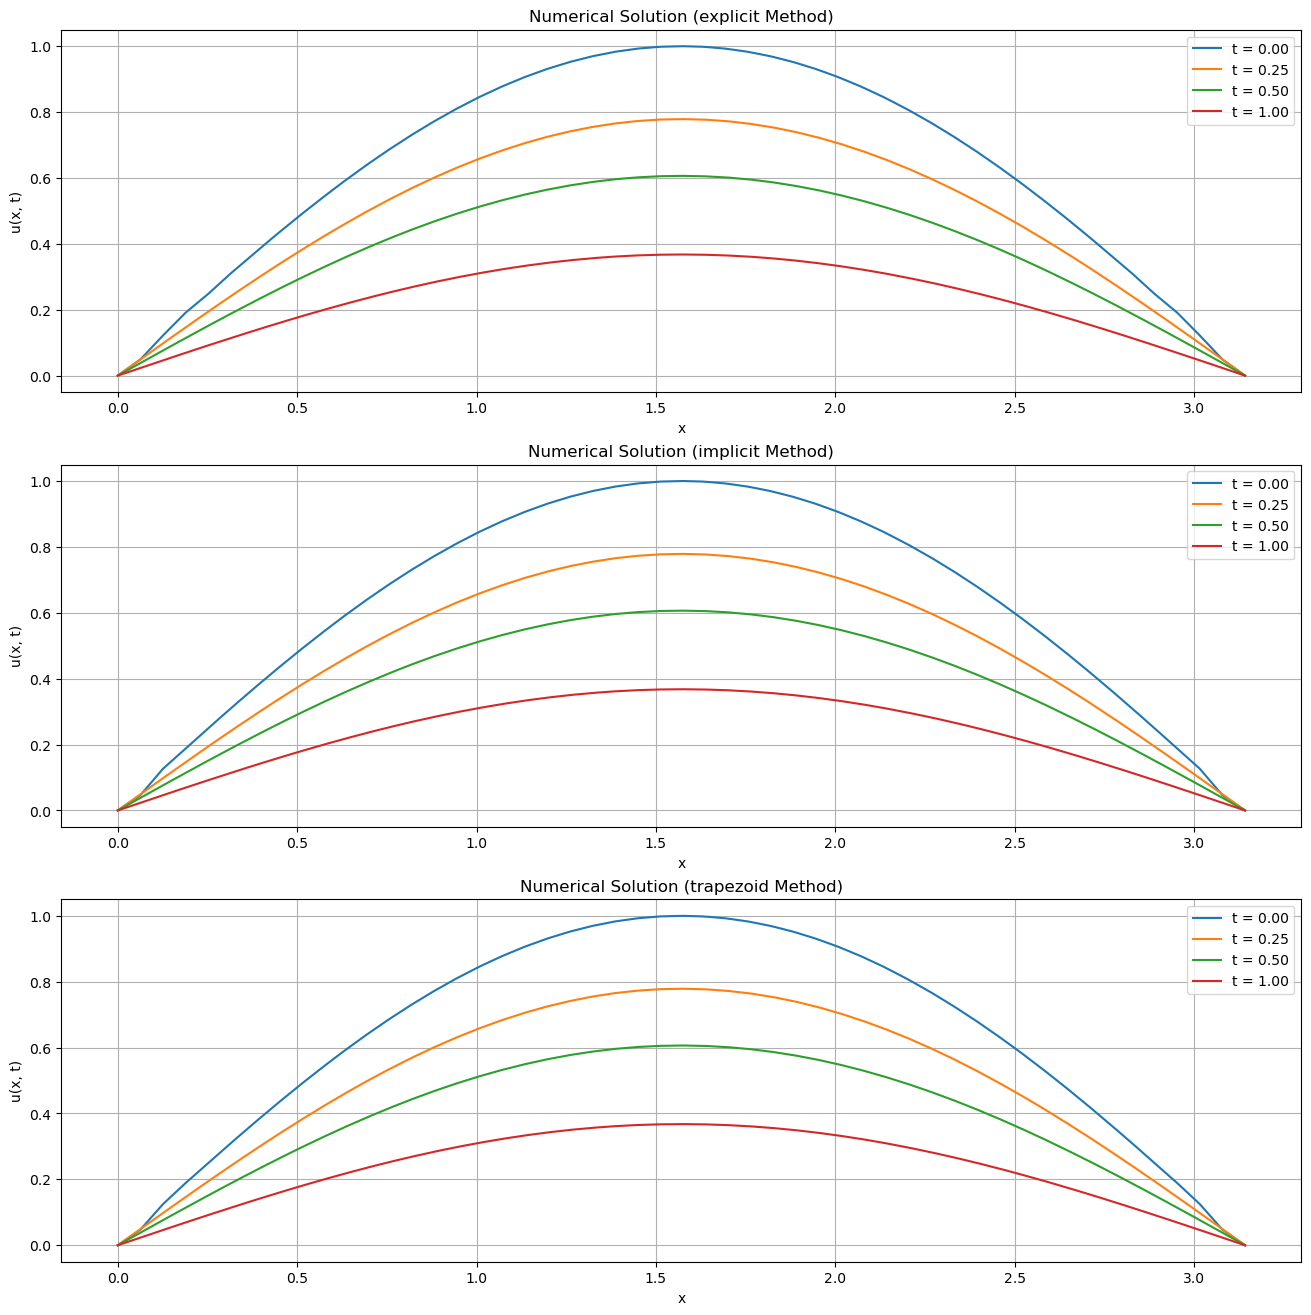

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def HatFunctions(x, j, xe):
    """Comes from the lab codes, and we do not need
    to modify it"""
    N = np.size(x) - 1 
    m = np.size(xe)
    phi = np.zeros(m)
    if 0 < j < N:
        ind1 = np.where((xe >= x[j-1]) & (xe <= x[j]))[0]
        ind2 = np.where((xe >= x[j]) & (xe <= x[j+1]))[0]
        phi[ind1] = (xe[ind1] - x[j-1]) / (x[j] - x[j-1])
        phi[ind2] = (x[j+1] - xe[ind2]) / (x[j+1] - x[j])
    elif j == 0:
        ind = np.where(xe <= x[1])[0]
        phi[ind] = (x[1] - xe[ind]) / (x[1] - x[0])
    elif j == N: 
        ind = np.where(xe >= x[N-1])[0]
        phi[ind] = (xe[ind] - x[N-1]) / (x[N] - x[N-1])
    else:
        raise ValueError('Value j must be between 0 and length(x)-1')
    return phi

def MassMatAssembler(x):
    """
    Assembles the mass matrix M based on node coordinates x.
    """
    N = np.size(x) - 1         # number of elements
    n = N - 1                  # dimension of the interior nodes
    M = np.zeros((n, n))       # initialize mass matrix to zero
    
    for i in range(0, n - 1):  # loop over elements
        h = x[i + 1] - x[i]    # element length
        # assemble element mass matrix
        M[i:i+2, i:i+2] += (h / 6) * np.array([[2, 1], [1, 2]])
    
    # Boundary adjustments for mass matrix
    h1 = x[1] - x[0]
    h2 = x[2] - x[1]
    hn = x[n] - x[n - 1]
    hn1 = x[n + 1] - x[n]
    M[0, 0] = (2 / 3) * h1 + (1 / 3) * h2
    M[n - 1, n - 1] = (1 / 3) * hn + (2 / 3) * hn1
    
    return M


def StiffMatAssembler(x):
#
# Returns the assembled stiffness matrix A
# Input is a vector x of node coords
#
    N = np.size(x) - 1        # number of elements
    n = N-1                  # dimension V_h^0 = size(x)-2
    S = np.zeros([n, n])      # initialize stiffnes matrix to zero
    for i in range (0,n-1):     # loop over elements
        h = x[i+1] - x[i]     # element length
        # assemble element stiffness
        S[i:i+2,i:i+2] = S[i:i+2,i:i+2] + np.array([[1, -1],[-1, 1]])/h
    
    h1 = x[1]-x[0]; h2 = x[2]-x[1]
    hn = x[n]-x[n-1]; hn1 = x[n+1]-x[n]
    S[0,0] = 1/h1+1/h2            # adjust for left BC
    S[n-1,n-1] = 1/hn+1/hn1        # adjust for right BC
    return -S

def LoadVecAssemblerInitial_Analytical(x):
    """Easier to understand how to calculate the results for LoadVec, mathematical analysis is written on my notes"""
    N = np.size(x) - 1        # number of elements
    n = N - 1                 # number of unknowns (interior nodes)
    F = np.zeros(n)           # initialize load vector F to zeros
    h = x[1] - x[0]           # assuming uniform mesh

    for i in range(1, N):  # i from 1 to N-1
        xi_minus = x[i-1]
        xi = x[i]
        xi_plus = x[i+1]
        F_i = (2 * np.sin(xi) - np.sin(xi_minus) - np.sin(xi_plus)) / h
        F[i-1] = F_i

    return F

def TimeStepping_explicit(M, S, U0, k, num_steps):
    """Unstable explicit time stepping,
    Large element needed"
    """
    n = len(U0)
    U = U0.copy()
    solutions = {}
    times_for_assignment = [0.0, 0.25, 0.5, 1.0]
    time_points = [k * i for i in range(num_steps + 1)]
    for t in time_points:
        U = U + k * np.linalg.inv(M) @ (S @ U)
        if t in times_for_assignment:
            solutions[t] = U.copy()
    return solutions

def TimeStepping_implicit(M, S, U0, k, num_steps):
    n = len(U0)
    U = U0.copy()
    solutions = {}
    times_for_assignment = [0.0, 0.25, 0.5, 1.0]
    time_points = [k * i for i in range(num_steps + 1)]
    A = M + k * -S
    for t in time_points:
        b = M @ U
        U_new = np.linalg.solve(A, b)
        U = U_new
        if t in times_for_assignment:
            solutions[t] = U.copy()
    return solutions

def TimeStepping_Trapezoidal_method(M, S, U0, k, num_steps):
    """Large element needed"""
    n = len(U0)
    U = U0.copy()
    solutions = {}
    times_for_assignment = [0.0, 0.25, 0.5, 1]
    time_points = [k * i for i in range(num_steps + 1)]
    A = M + k/2 * -S
    for t in time_points:
        b = (M + k/2 * S)@ U
        U_new = np.linalg.solve(A, b)
        U = U_new
        if t in times_for_assignment:
            solutions[t] = U.copy()
    return solutions
# Parameters
a, b = 0, np.pi       # interval [a,b] = [0, π]
N = 50               # number of elements
h = (b - a) / N       # mesh size
x = np.linspace(a, b, N + 1)  # node coordinates
n = N - 1             # number of unknowns (interior nodes)
k = 0.0005              # time step size
t_final = 1.0
num_steps = int(t_final / k)

# Assemble matrices
M = MassMatAssembler(x)
S = StiffMatAssembler(x)

# Initial condition
F = LoadVecAssemblerInitial_Analytical(x)
U0 = np.linalg.solve(M, F)

# Evaluation points
xe = np.linspace(a, b, 300)
PHI = np.zeros((np.size(xe), n))
for j in range(1, N):
    PHI[:, j - 1] = HatFunctions(x, j, xe)
    

figure = plt.figure(figsize=(16, 16))
rows, cols = 3, 1
method = {'explicit': TimeStepping_explicit,
          'implicit': TimeStepping_implicit,
          'trapezoid': TimeStepping_Trapezoidal_method,}
for index, (method_name, method) in enumerate(method.items()):
    solutions = {0.0: U0.copy()}
    solutions.update(method(M, S, U0, k, num_steps))
    
    ax = figure.add_subplot(rows, cols, index + 1)
    for t in sorted(solutions.keys()):
        U = solutions[t]
        uh = PHI @ U
        ax.plot(xe, uh, label=f't = {t:.2f}')
    ax.set_title(f"Numerical Solution ({method_name} Method)")
    ax.set_xlabel("x")
    ax.set_ylabel("u(x, t)")
    ax.legend()
    ax.grid()
"""Here show the resulting figure with fixed N = 50 for explicit, implicit, trapezoidal method"""

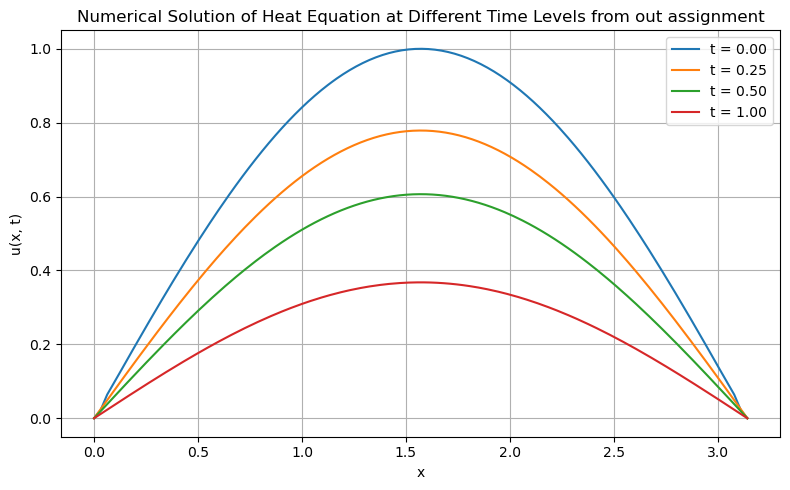

In [53]:
# Parameters
a, b = 0, np.pi       # interval [a,b] = [0, π]
N = 100               # number of elements
h = (b - a) / N       # mesh size
x = np.linspace(a, b, N + 1)  # node coordinates
n = N - 1             # number of unknowns (interior nodes)
k = 0.00005              # time step size
"""
!!! K must <= 0.5*h**2 !!!
"""
t_final = 1.0
num_steps = int(t_final / k)

# Assemble matrices
M = MassMatAssembler(x)
S = StiffMatAssembler(x)

# Initial condition
F = LoadVecAssemblerInitial_Analytical(x)
U0 = np.linalg.solve(M, F)

# Time-stepping
solutions = {0.0: U0.copy()}  # dict
solutions.update(TimeStepping_explicit(M, S, U0, k, num_steps))

# Evaluation points
xe = np.linspace(a, b, 300)
PHI = np.zeros((np.size(xe), n))
for j in range(1, N):
    PHI[:, j - 1] = HatFunctions(x, j, xe)

# Plotting
plt.figure(figsize=(8, 5))
for t in sorted(solutions.keys()):
    U = solutions[t]
    uh = PHI @ U
    plt.plot(xe, uh, label=f't = {t:.2f}')
plt.title('Numerical Solution of Heat Equation at Different Time Levels from out assignment')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

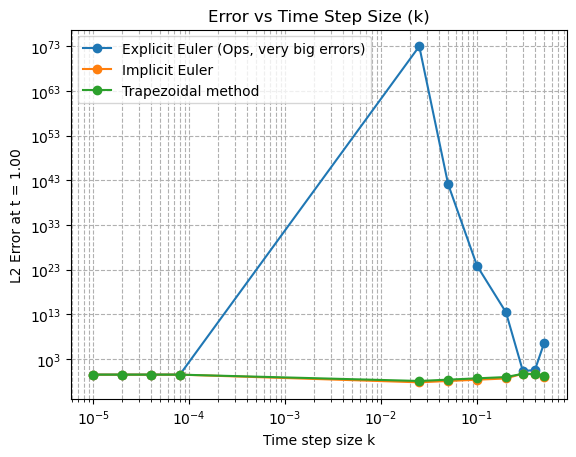

In [54]:
# Error vs. Time Step Size (k) with fixed h or N
N = 50               # number of elements
h = (b - a) / N       # mesh size
x = np.linspace(a, b, N + 1)  # node coordinates
n = N - 1             # interior nodes

# Assemble matrices
M = MassMatAssembler(x)
S = StiffMatAssembler(x)

# Initial condition
F = LoadVecAssemblerInitial_Analytical(x)
U0 = np.linalg.solve(M, F)

x_interior = x[1:-1]
t_final = 1.0

# Define decreasing k values
k_values = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.025,0.00008,0.00004,0.00002,0.00001]

# Lists to store errors for each solver
errors_explicit = []
errors_implicit = []
errors_crank_nicolson = []

# Function to get the solution at t_final from the solutions dictionary
def get_solution_at_t(solutions, t_target):
    for t in solutions:
        if np.isclose(t, t_target, atol=1e-8):
            return solutions[t]
    # If not found, find the closest time
    times = list(solutions.keys())
    t_values = np.array(times)
    index = np.argmin(np.abs(t_values - t_target))
    t_closest = t_values[index]
    return solutions[t_closest]

for k in k_values:
    num_steps = int(t_final / k)
    
    # Explicit Euler method
    solutions_explicit = TimeStepping_explicit(M, S, U0, k, num_steps)
    U_explicit = get_solution_at_t(solutions_explicit, t_final)
    u_exact = np.exp(-t_final) * np.sin(x_interior)
    e_explicit = U_explicit - u_exact
    error_explicit = np.sqrt(e_explicit.T @ M @ e_explicit)
    errors_explicit.append(error_explicit)
    
    # Implicit Euler method
    solutions_implicit = TimeStepping_implicit(M, S, U0, k, num_steps)
    U_implicit = get_solution_at_t(solutions_implicit, t_final)
    e_implicit = U_implicit - u_exact
    error_implicit = np.sqrt(e_implicit.T @ M @ e_implicit)
    errors_implicit.append(error_implicit)
    
    # Crank-Nicolson method
    solutions_cn = TimeStepping_Trapezoidal_method(M, S, U0, k, num_steps)
    U_cn = get_solution_at_t(solutions_cn, t_final)
    e_cn = U_cn - u_exact
    error_cn = np.sqrt(e_cn.T @ M @ e_cn)
    errors_crank_nicolson.append(error_cn)


# Plotting error vs k
plt.figure()
plt.loglog(k_values, errors_explicit, '-o', label='Explicit Euler (Ops, very big errors)')
plt.loglog(k_values, errors_implicit, '-o', label='Implicit Euler')
plt.loglog(k_values, errors_crank_nicolson, '-o', label='Trapezoidal method')
plt.xlabel('Time step size k')
plt.ylabel('L2 Error at t = {:.2f}'.format(t_final))
plt.title('Error vs Time Step Size (k)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()



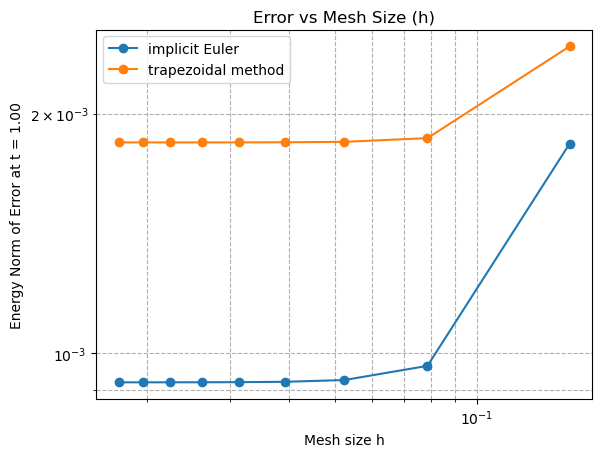

In [55]:
# Error vs Mesh Size (h)

# Fixed time step size
k_fixed = 0.004
t_final = 1.0
num_steps = int(t_final / k_fixed)

# Define increasing N values to get decreasing h
N_values = [20*k for k in range(1, 10)]
h_values = []
errors_energy1 = []
errors_energy3 = []
for N in N_values:
    h = (b - a) / N
    h_values.append(h)
    x = np.linspace(a, b, N + 1)
    n = N - 1
    M = MassMatAssembler(x)
    S = StiffMatAssembler(x)
    F = LoadVecAssemblerInitial_Analytical(x)
    U0 = np.linalg.solve(M, F)
    
    # Use the implicit solver
    solutions = TimeStepping_implicit(M, S, U0, k_fixed, num_steps)
    U = get_solution_at_t(solutions, t_final)
    x_interior = x[1:-1]
    u_exact = np.exp(-t_final) * np.sin(x_interior)
    e = U - u_exact
    energy_norm = np.sqrt(e.T @ (-S) @ e)
    errors_energy1.append(energy_norm)
    
    
    solutions = TimeStepping_Trapezoidal_method(M, S, U0, k_fixed, num_steps)
    U = get_solution_at_t(solutions, t_final)
    x_interior = x[1:-1]
    u_exact = np.exp(-t_final) * np.sin(x_interior)
    e = U - u_exact
    energy_norm = np.sqrt(e.T @ (-S) @ e)
    errors_energy3.append(energy_norm)

# Plotting error vs h
plt.figure()
plt.loglog(h_values, errors_energy1, '-o', label='implicit Euler')
#plt.loglog(h_values, errors_energy2, '-o', label='Explicit Euler')
plt.loglog(h_values, errors_energy3, '-o', label='trapezoidal method')
plt.xlabel('Mesh size h')
plt.ylabel('Energy Norm of Error at t = {:.2f}'.format(t_final))
plt.title('Error vs Mesh Size (h)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()


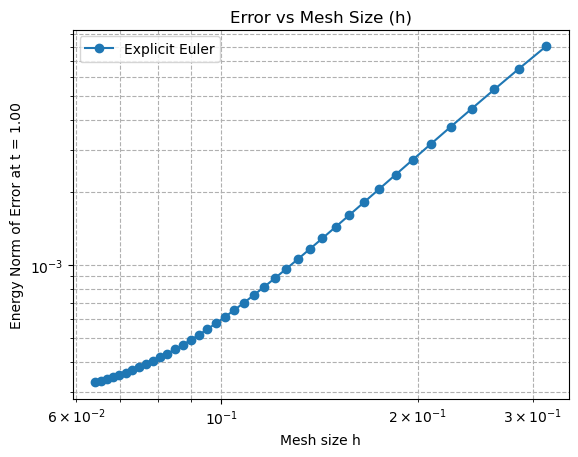

In [56]:
# Error vs Mesh Size (h)

# Fixed time step size
k_fixed = 0.0004
t_final = 1.0
num_steps = int(t_final / k_fixed)

# Define increasing N values to get decreasing h
N_values = [k for k in range(10,50)]
h_values = []
errors_energy1 = []
errors_energy2 = []
errors_energy3 = []
for N in N_values:
    h = (b - a) / N
    h_values.append(h)
    x = np.linspace(a, b, N + 1)
    n = N - 1
    M = MassMatAssembler(x)
    S = StiffMatAssembler(x)
    F = LoadVecAssemblerInitial_Analytical(x)
    U0 = np.linalg.solve(M, F)
    

    
    solutions = TimeStepping_explicit(M, S, U0, k_fixed, num_steps)
    U = get_solution_at_t(solutions, t_final)
    x_interior = x[1:-1]
    u_exact = np.exp(-t_final) * np.sin(x_interior)
    e = U - u_exact
    energy_norm = np.sqrt(e.T @ (-S) @ e)
    errors_energy2.append(energy_norm)
    

# Plotting error vs h
plt.figure()
plt.loglog(h_values, errors_energy2, '-o', label='Explicit Euler')
plt.xlabel('Mesh size h')
plt.ylabel('Energy Norm of Error at t = {:.2f}'.format(t_final))
plt.title('Error vs Mesh Size (h)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()
